In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.5MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 1.0MB 19.1MB/s 
     |████████████████████████████████| 358kB 28.8MB/s 
     |████████████████████████████████| 92kB 10.4MB/s 
     |████████████████████████████████| 40kB 6.6MB/s 
     |████████████████████████████████| 40kB 7.1MB/s 
     |████████████████████████████████| 51kB 9.5MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 2.6MB 16.8MB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
%cd '/content/gdrive/My Drive/'

/content/gdrive/My Drive


In [5]:
path = Path('hackathon_data')

In [6]:
#checking the path for our images
fns = get_image_files(path)
fns

(#4500) [Path('hackathon_data/Tomato Late Blight/7879051c-bbca-4c32-946d-34cf2a02434d___GHLB2 Leaf 8851_final_masked.jpg'),Path('hackathon_data/Tomato Late Blight/7a08fe4d-cb32-4a4e-861e-249e582fb8c8___GHLB2 Leaf 8820_final_masked.jpg'),Path('hackathon_data/Tomato Late Blight/7872b2c5-2b59-4f28-aab0-f9346486c83a___RS_Late.B 5332_final_masked.jpg'),Path('hackathon_data/Tomato Late Blight/7f3e0b01-3bfc-44d2-b04d-b27032115a6c___GHLB2 Leaf 9106_final_masked.jpg'),Path('hackathon_data/Tomato Late Blight/7d9f4bd8-6a41-4c5e-816e-175f88e0be41___RS_Late.B 5488_final_masked.jpg'),Path('hackathon_data/Tomato Late Blight/7c367715-8147-42a2-803a-987828f88d76___GHLB2 Leaf 144.2_final_masked.jpg'),Path('hackathon_data/Tomato Late Blight/8217ab61-6b5f-4874-8046-d801d40cff3d___RS_Late.B 6089_final_masked.jpg'),Path('hackathon_data/Tomato Late Blight/8224fe93-c0bc-47e1-8ef4-3572667de662___GHLB2 Leaf 8694_final_masked.jpg'),Path('hackathon_data/Tomato Late Blight/830c33b8-d419-4fb7-98f8-08387e726648___GH

In [7]:
# Set up for training:

plants = DataBlock(
          blocks=(ImageBlock, CategoryBlock), 
          get_items=get_image_files, 
          splitter=RandomSplitter(valid_pct=0.2, seed=42),
          get_y=parent_label,
         item_tfms=Resize(256,256))

In [8]:
dls = plants.dataloaders(path)

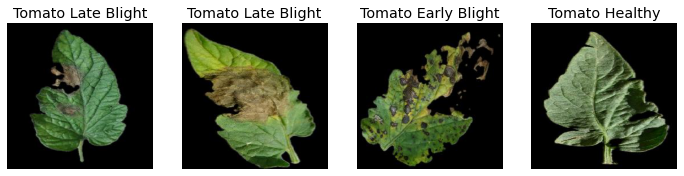

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

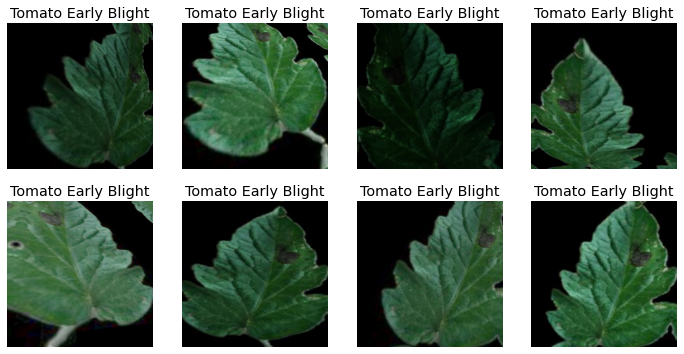

In [10]:
plants = plants.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(2))
dls = plants.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [11]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(7)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.574776,0.331820,0.102222,13:01


epoch,train_loss,valid_loss,error_rate,time
0,0.233685,0.244303,0.058889,00:26
1,0.159072,0.087646,0.030000,00:26
2,0.106724,0.054561,0.016667,00:26
3,0.073436,0.072755,0.025556,00:26


In [14]:
learn.fine_tune(7)

epoch,train_loss,valid_loss,error_rate,time
0,0.069875,0.088635,0.027778,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.063460,0.071558,0.025556,00:26
1,0.089920,0.159424,0.048889,00:26
2,0.084427,0.052094,0.021111,00:26
3,0.075016,0.105761,0.040000,00:26
4,0.050359,0.053581,0.023333,00:26
5,0.032998,0.030901,0.012222,00:26
6,0.027889,0.027393,0.011111,00:26


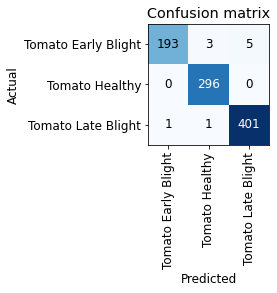

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [16]:
# export for inference
learn.export()

In [17]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [18]:
learn_inf = load_learner(path/'export.pkl')